In [10]:
# append parent directory to path, so that we can import modules from histpat_toolkit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# here You may have to install histpat_toolkit via pip
import cv2
import IPython
import numpy as np
from PIL import Image

from histpat_toolkit.dzi_file import DZIFile
from histpat_toolkit.geom import Rectangle
from histpat_toolkit.image_pyramid import DZIPyramid

In [12]:
def my_display(arr: np.ndarray):
    ext = ".png" if len(arr.shape) == 2 or arr.shape[2] == 1 or arr.shape[2] == 4 else ".jpg"
    arr = arr.copy()
    if len(arr.shape) == 2:
        print(arr.shape)
        arr = arr.reshape((*arr.shape, 1))
        print(arr.shape)

    if arr.shape[2] > 1:
        arr[:, :, :3] = arr[:, :, :3][:, :, ::-1]
    _, ret = cv2.imencode(ext, arr)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


def show_full(dzi_pyramid: DZIPyramid, scale: float = 1.0):
    arr = dzi_pyramid.full_image(scale=scale)
    my_display(arr)
    # display(PIL.Image.fromarray(arr))


def show_rect(dzi_pyramid: DZIPyramid, rect: Rectangle, scale: float = 1.0, allow_out_of_bounds: bool = False):
    arr = dzi_pyramid.crop_rect(rect, scale=scale, allow_out_of_bounds=allow_out_of_bounds)
    my_display(arr)
    # display(PIL.Image.fromarray(arr))

png_pyramid.size = (210, 211)


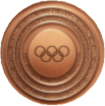

jpg_pyramid.size = (739, 320)


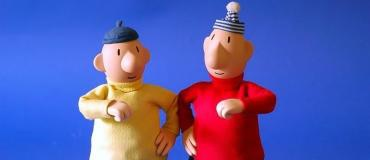

In [13]:
png_pyramid = DZIPyramid(DZIFile("http://0.0.0.0:8000/test_png.dzi"))
jpg_pyramid = DZIPyramid(DZIFile("http://0.0.0.0:8000/test_jpg.dzi"))
assert png_pyramid.dzi_file.format == "png"
assert jpg_pyramid.dzi_file.format != "png"

print(f"{png_pyramid.size = }")
show_full(png_pyramid, scale=0.5)

print(f"{jpg_pyramid.size = }")
show_full(jpg_pyramid, scale=0.5)

[(125., 125.) (175., 125.) (175., 175.) (125., 175.)]
[(125., 125.) (175., 125.) (175., 175.) (125., 175.)]


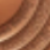

[(  0.,   0.) (170.,   0.) (170., 170.) (  0., 170.)]
[(  0.,   0.) (170.,   0.) (170., 170.) (  0., 170.)]


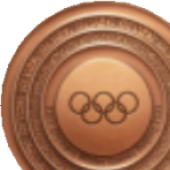

[(100.     , 100.      ) (157.7735 ,  60.475025) (197.29848, 118.24852 )
 (139.52498, 157.7735  )]
[(100.     , 100.      ) (157.7735 ,  60.475025) (197.29848, 118.24852 )
 (139.52498, 157.7735  )]


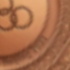

In [15]:
# PNG TEST IN BOUNDS
scale = 1
show_rect(png_pyramid, Rectangle(125, 125, 50, 50).scale(scale), scale=scale)
show_rect(png_pyramid, Rectangle(0, 0, 170, 170, 0).scale(scale), scale=scale)
show_rect(png_pyramid, Rectangle(100, 100, 70, 70, 0.6).scale(scale), scale=scale)
# show_rect(png_pyramid, Rectangle(500, 500, 80, 160))

[(  0.      ,   0.      ) (100.31033 , -31.029621)
 (131.48772 ,  69.75838 ) ( 31.177382, 100.788   )]
[(  0.      ,   0.      ) (100.31033 , -31.029621)
 (131.48772 ,  69.75838 ) ( 31.177382, 100.788   )]


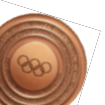

[(-75.     , 175.      ) (134.01201, -40.206833) (349.21884, 168.80518 )
 (140.20683, 384.01202 )]
[(-75.     , 175.      ) (134.01201, -40.206833) (349.21884, 168.80518 )
 (140.20683, 384.01202 )]


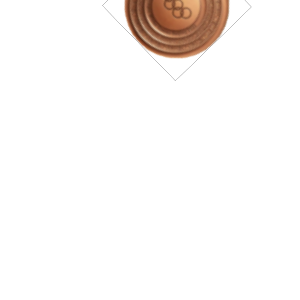

[(-350.     , -250.     ) ( 366.50238, -471.64014)
 ( 588.1425 ,  244.86224) (-128.35985,  466.50238)]
[(-350.     , -250.     ) ( 366.50238, -471.64014)
 ( 588.1425 ,  244.86224) (-128.35985,  466.50238)]


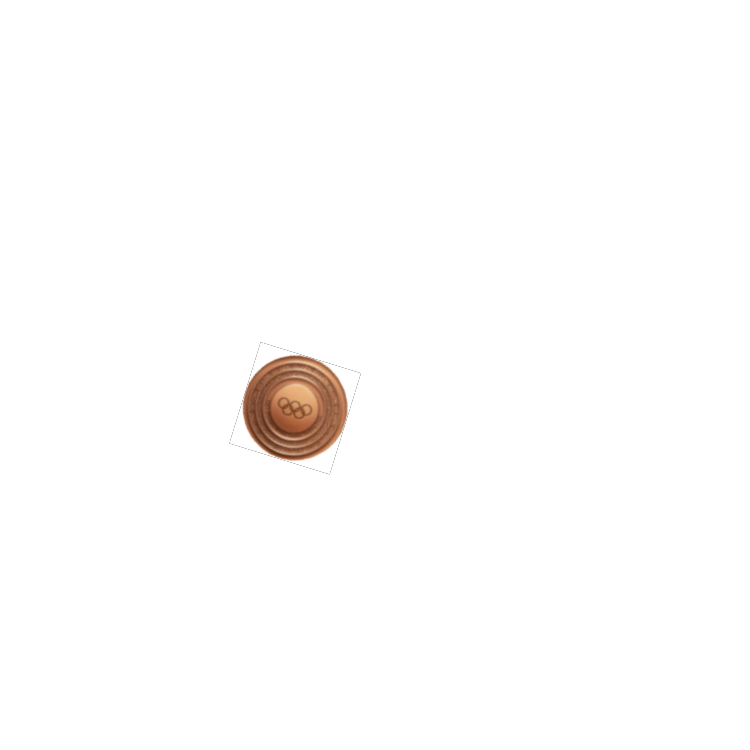

[(100000.5  , 100000.5  ) (100000.836,  99999.555)
 (100001.78 ,  99999.89 ) (100001.445, 100000.836)]


In [6]:
# PNG OUT OF BOUNDS TEST
scale = 0.5
show_rect(png_pyramid, Rectangle(0, 0, *png_pyramid.size, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(png_pyramid, Rectangle(-150, 350, 600, 600, 0.8).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(png_pyramid, Rectangle(-700, -500, 1500, 1500, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)

my_inf = 1e5 + 0.5
show_rect(png_pyramid, Rectangle(my_inf, my_inf, 1, 1, 1.23), allow_out_of_bounds=True)

[(  0.,   0.) (100.,   0.) (100., 100.) (  0., 100.)]
[(  0.,   0.) (100.,   0.) (100., 100.) (  0., 100.)]


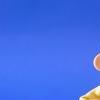

In [7]:
# PNG TEST IN BOUNDS
scale = 0.5
show_rect(jpg_pyramid, Rectangle(0, 0, 200, 200).scale(scale), scale=scale)
# show_rect(jpg_pyramid, Rectangle(125, 125, 250, 250, .5).scale(scale), scale=scale)
# show_rect(jpg_pyramid, Rectangle(300, 300, 250, 250, 3.1415 + 0.2).scale(scale), scale=scale)
# show_rect(jpg_pyramid, Rectangle(500, 500, 80, 160))

[(  0.      ,   0.      ) (100.31033 , -31.029621)
 (131.48772 ,  69.75838 ) ( 31.177382, 100.788   )]
[(  0.      ,   0.      ) (100.31033 , -31.029621)
 (131.48772 ,  69.75838 ) ( 31.177382, 100.788   )]


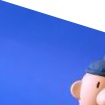

[(-75.     , 175.      ) (134.01201, -40.206833) (349.21884, 168.80518 )
 (140.20683, 384.01202 )]
[(-75.     , 175.      ) (134.01201, -40.206833) (349.21884, 168.80518 )
 (140.20683, 384.01202 )]


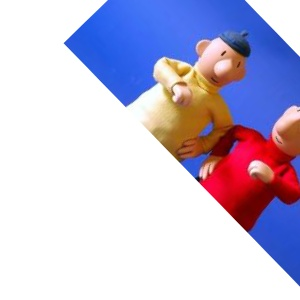

[(-350.     , -250.     ) ( 366.50238, -471.64014)
 ( 588.1425 ,  244.86224) (-128.35985,  466.50238)]
[(-350.     , -250.     ) ( 366.50238, -471.64014)
 ( 588.1425 ,  244.86224) (-128.35985,  466.50238)]


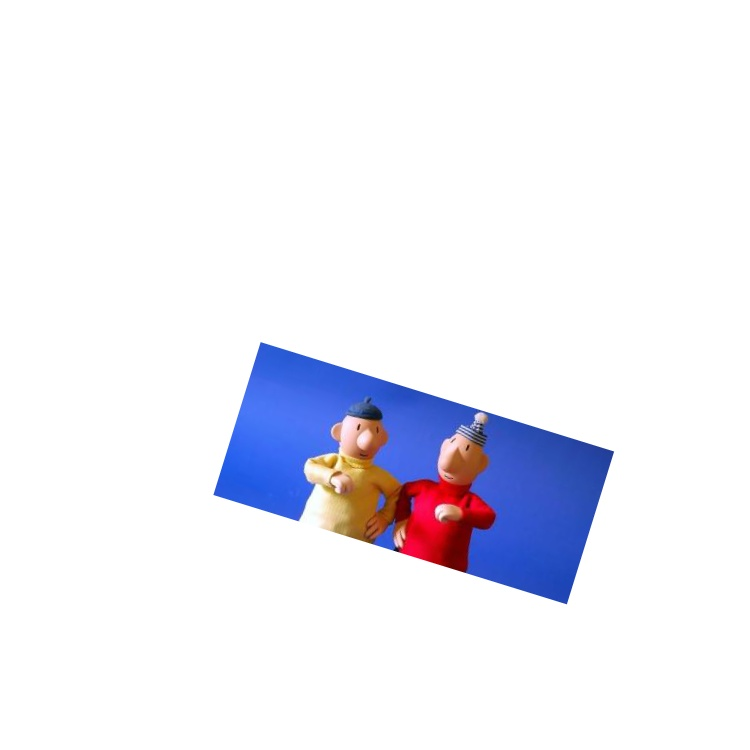

[(100000.5  , 100000.5  ) (100000.836,  99999.555)
 (100001.78 ,  99999.89 ) (100001.445, 100000.836)]


In [8]:
# JPG OUT OF BOUNDS TEST
scale = 0.5
show_rect(jpg_pyramid, Rectangle(0, 0, *png_pyramid.size, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(jpg_pyramid, Rectangle(-150, 350, 600, 600, 0.8).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(jpg_pyramid, Rectangle(-700, -500, 1500, 1500, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)

my_inf = 1e5 + 0.5
show_rect(jpg_pyramid, Rectangle(my_inf, my_inf, 1, 1, 1.23), allow_out_of_bounds=True)

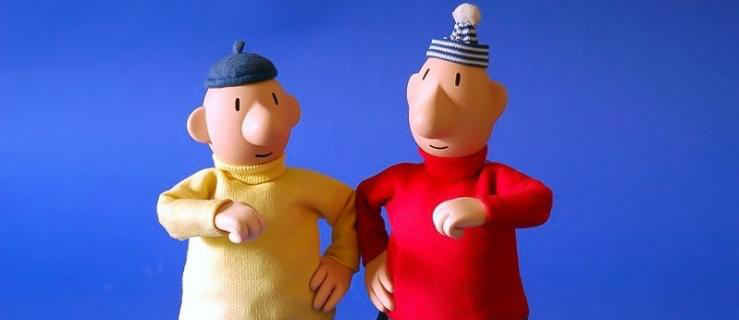

(320, 739, 3)
[(200.     ,  10.     ) (494.01996,  69.6008 ) (434.41916, 363.62076)
 (140.3992 , 304.01996)]
[(200.     ,  10.     ) (494.01996,  69.6008 ) (434.41916, 363.62076)
 (140.3992 , 304.01996)]


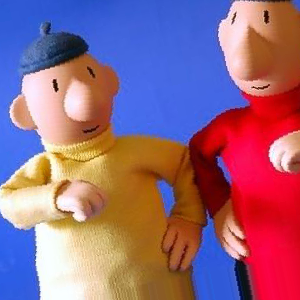

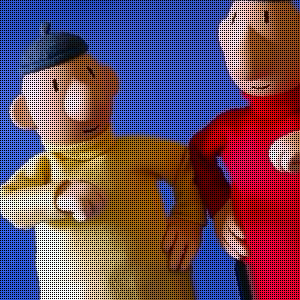

[(200.     ,  10.     ) (494.01996,  69.6008 ) (434.41916, 363.62076)
 (140.3992 , 304.01996)]
[(200.     ,  10.     ) (494.01996,  69.6008 ) (434.41916, 363.62076)
 (140.3992 , 304.01996)]


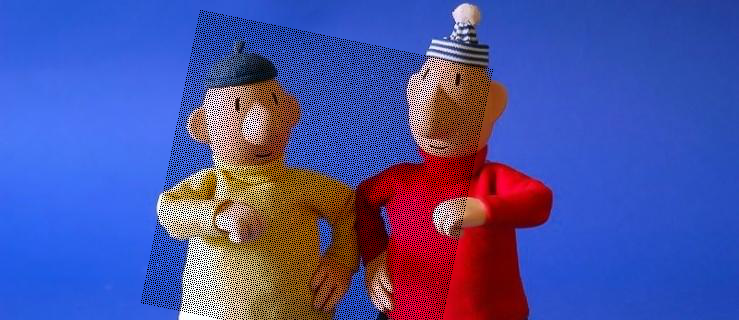

In [9]:
from histpat_toolkit.geom import crop_rect_from_img, paste_rect_into_img

arr = jpg_pyramid.full_image(scale=1)
display(Image.fromarray(arr))
print(arr.shape)

rect = Rectangle(200, 10, 300, 300, -0.2)
cropped = crop_rect_from_img(arr, rect=rect)
display(Image.fromarray(cropped))

cropped[::2, ::2] = 0

display(Image.fromarray(cropped))

modified_arr = paste_rect_into_img(arr.copy(), cropped, rect)

display(Image.fromarray(modified_arr))